In [1]:
DATA_PATH = "../ML_2_SaraElaraby/creditcard.csv"

<p1>Firstly, We'll import all the necessary packages that we might need throughout this journey to detect Fraud transactions.</p1>

In [2]:
""" Import packages """

import pandas as pd
import numpy as np

import seaborn as sns
sns.set()  # Setting seaborn as default style even if use only matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import LogNorm

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import classification_report

import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")  # To ignore warnings


---

<center> <h1> <B>Credit Card Fraud Detection</B> </h1> </center>

---

## What is GMM ?

Gaussian Mixture Model, GMM in short, which is an Unsupervised Clustering approach. In this approach, unlike K-Means we fit ‘k’ Gaussians to the data. Then we find the Gaussian distribution parameters like mean and Variance for each cluster and weight of a cluster. Finally, for each data point, we calculate the probabilities of belonging to each of the clusters.

<center> <img src="https://miro.medium.com/max/1400/1*lTv7e4Cdlp738X_WFZyZHA.png" width="60%" height="240"></center>

Mathematically, we can write the Gaussian model in 2 ways as follows:
    
            1.Univariate Case: One-dimensional Model

<center> <img src="https://miro.medium.com/max/780/1*pIVuhCDp-p9LPBeMO2IyKw.png" width="40%" height="240"></center>

                     and

<center> <img src="https://miro.medium.com/max/1248/1*sYQEigWG61utVDaOeoEUzQ.png" width="60%" height="240" > </center>

                     where μk = mean & σk = variance for the kth component.
                           ϕk = weight for the cluster ‘k’.

            2. Multivariate Case: Multi-dimensional Model


<center> <img src="https://miro.medium.com/max/738/1*-iuPfG1VIGqik6AeJ25_WA.png" width="40%" height="240" ></center> 

                     where μk = mean & Σk = covariance matrix for the kth component. 
                           ϕk= weight for the cluster ‘k’.

---

Now, We are going to read dataset and check out how it looks like. 

In [3]:
# Read the CSV file
df = pd.read_csv(DATA_PATH)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


---

## EDA

First, We'll draw a scatter and hist plots for the number of transactions for each fraudulent and non-fraudulent vs. time. 

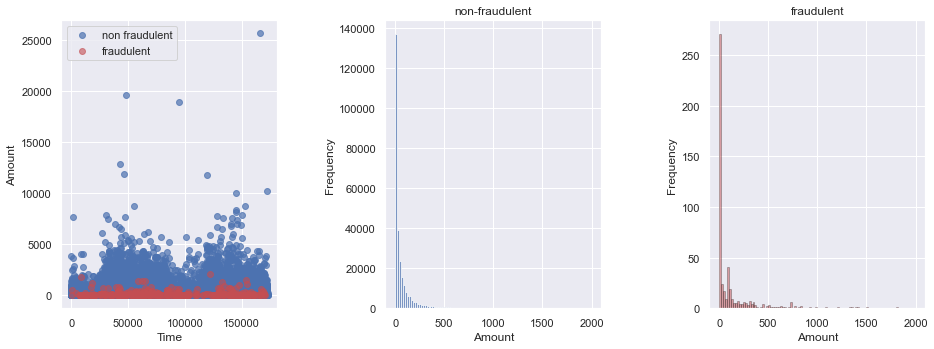

In [6]:
fig, ax = plt.subplots(1, 3)

ax[0].scatter(df['Time'][df['Class']   == 0], 
              df['Amount'][df['Class'] == 0], color = 'b', alpha = 0.7)
ax[0].scatter(df['Time'][df['Class']   == 1], 
              df['Amount'][df['Class'] == 1], color = 'r' , alpha = 0.6)
ax[0].legend(['non fraudulent', 'fraudulent'], loc = 'best')

ax[1].hist(df['Amount'][df['Class'] == 0], 100, facecolor = 'b', alpha = 0.7, 
           label = "Distribution of amounts for non-fraudulent ", range = [0, 2000])
ax[2].hist(df['Amount'][df['Class'] == 1], 100, facecolor = 'r', ec = "black", lw = 0.5, 
           alpha = 0.5, label = "Distribution of amounts for fraudulent", range = [0, 2000])

ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amount")
ax[1].set_xlabel("Amount")
ax[1].set_ylabel("Frequency")
ax[2].set_xlabel("Amount")
ax[2].set_ylabel("Frequency")

ax[1].set_title('non-fraudulent')
ax[2].set_title('fraudulent')

fig.subplots_adjust(left = 0, right = 2, bottom = 0, top = 1, hspace = 0.05, wspace = 0.5)

        ------------------------
          We can notice that :
        ------------------------
        1- all the fraudulent amounts and also the majority of non-fraudulent amounts are below 2000 euros.
        2- Which means that the amount won't have a huge impact on detecting a non-fraudulent transaction. 

Let's calculate the correlation matrix using a mask to plot only part of a matrix. What we want to get here is which components are more correlated with the class, time and amount.

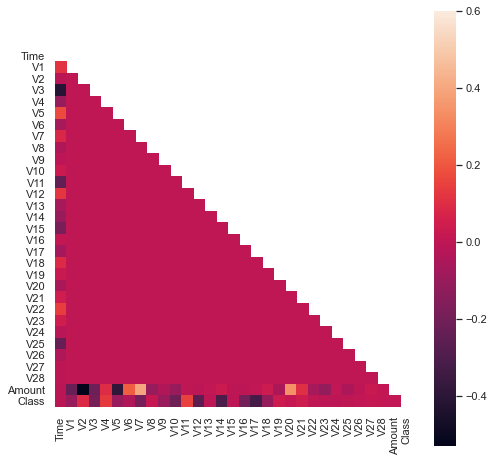

In [7]:
# Correlation matrix
corr = df.corr()
mask = np.zeros_like(corr)
# Return the indices for the upper-triangle of arr
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize = (8, 8))
    ax = sns.heatmap(corr, xticklabels = corr.columns.values,
                     yticklabels = corr.columns.values, 
                     mask = mask, vmax = 0.6, square = True)
plt.show()

        - We can analyze that the amount of transactions or the time isn't correlated with the class. 
        - The most positively correlated components with the class is V11 and V4, while the most negative correlated are V17 and V14.

Now, to make things more obvious if you still confused. We'll use these four PCs and add two more random components such as V13 and V15. Then, we will draw the distribution of features for each class.

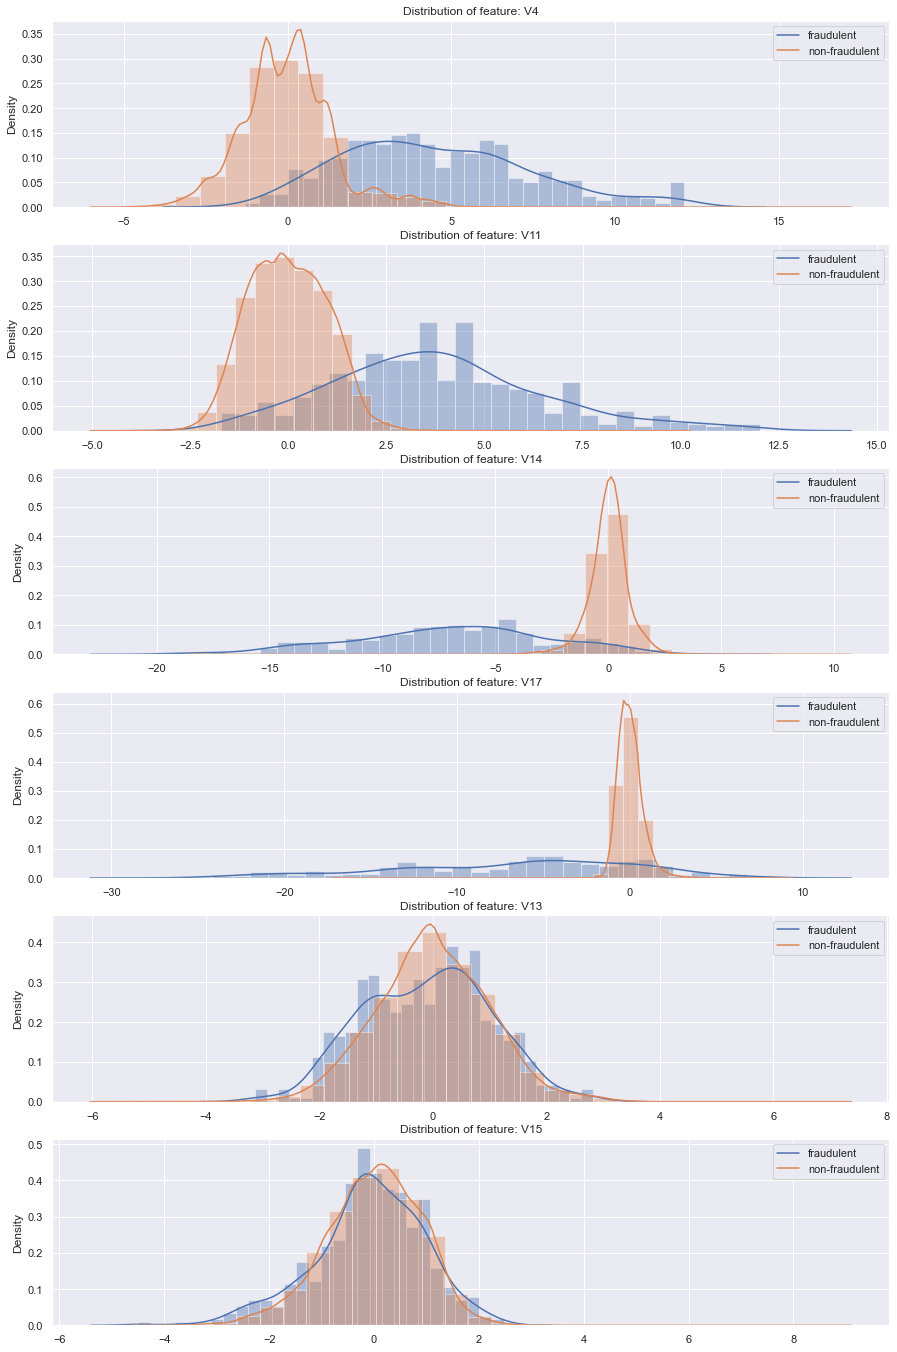

In [8]:
# Selected features
features = ['V4', 'V11', 'V14', 'V17', 'V13', 'V15']

n = np.size(features)
plt.figure(figsize = (15, 4 * n))

gs = gridspec.GridSpec(n ,1)

for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.distplot(df[feat][df.Class == 1], bins = 30)
    sns.distplot(df[feat][df.Class == 0], bins = 30)
    ax.legend(['fraudulent', 'non-fraudulent'], loc = 'best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

      It's obviouse from the previous plots that the separation between the two classes is unworkable when choosing V13 and V15. 

Now let's evaluate the range of values of the features and their average + std

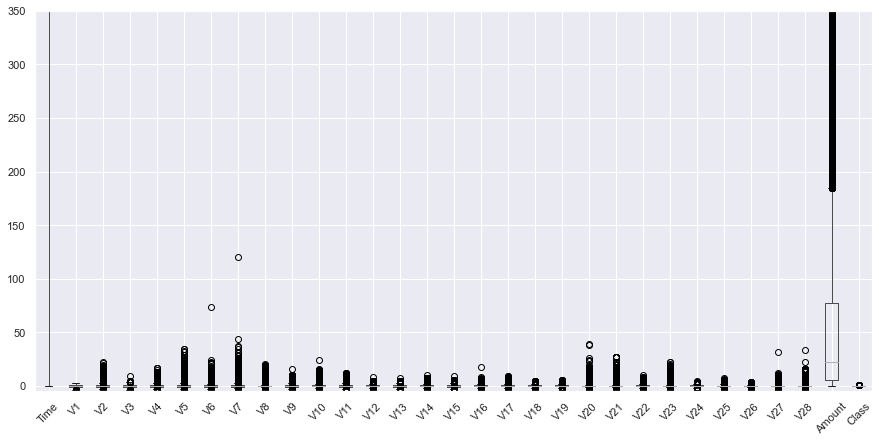

In [9]:
# Evaluate the ranges of features
df.boxplot(figsize = (15, 7))
plt.ylim((-5, 350))
locs, labels = plt.xticks()
plt.setp(labels, rotation = 45)
plt.show()

     We analyze that 'amount' and 'time' need to be scaled. So, We will use a MinMax() scaler to scale all features from 0-1. 

---

# **Anomaly Detection Using Logistic Regression**

We are going to train a simple supervised LogisticRegression model. Please keep in your mind that this is not a very smart model for several reasons: 
- First, the data is highly unbalanced. 
- Second, we are assuming a linear classification problem. 
- Finally, we are not performing any kind of feature selection. 

A more advanced model will be applied later, where I will apply GMM to the `non-fraudulent` cases and detect anomalies by `comparing the fraudulent test cases to the trained GMM`.

In [10]:
# Split the dataset into train and test using stratify method
X_train, X_test, y_train, y_test = train_test_split( df.drop(['Class'], axis = 1),
                                                     df['Class'], test_size = 0.2, 
                                                     random_state = 0,
                                                     stratify = df['Class'] )

# To insure that the data is splitted with the same fraudulent ratio 
print('Percentage of fraudulent in train = ' + str(sum(y_train) 
                                                   / np.size(X_train, 0) * 100) + '%')
print('Percentage of fraudulent in test  = ' + str(sum(y_test)  
                                                   / np.size(X_test, 0)  * 100) + '%')

Percentage of fraudulent in train = 0.17292457591783889%
Percentage of fraudulent in test  = 0.17204452090867595%


In [11]:
# Now perform cross_validation with grid_search to find optimal parameter for the model
# Note we apply this on training data 
kfold = KFold (n_splits = 3, random_state = 1)     # Create 3-CV split object    
model = LogisticRegression()
pipe_lm    = Pipeline([('minmax', MinMaxScaler()),
                       ('lmodel', model)])
param_grid = [{'lmodel__C': 
                     [0.01, 0.1, 1.0]}]     # Inverse of regularization strength (C = 1/λ)

clf = GridSearchCV( pipe_lm,
                    param_grid, 
                    cv = kfold,
                    scoring = 'average_precision' )       # Nested-3fold-CV

outer_average_precission = cross_val_score( clf,
                                            X_train, y_train,
                                            scoring = 'average_precision', 
                                            cv = kfold )        # Outer-3fold-CV

# AUPRC -->  the area under the PR curve
# PR curve  --> the trade-off between precision and recall across different decision thresholds
# print outer_average_precission
print('3-fold CV average AUCPR: %.3f +/- %.3f' % (outer_average_precission.mean(), 
                                                                outer_average_precission.std())) 

3-fold CV average AUCPR: 0.756 +/- 0.019


In [12]:
# Fit the model with optimal parameter 
# Using all the training data to evaluate feature importance.                 
clf.fit(X_train, y_train)
lm_best_alpha = LogisticRegression(C = clf.best_params_['lmodel__C'], 
                                   random_state = 1)
pipe_lm_best  = Pipeline([('minmax', MinMaxScaler()),
                          ('lmodel', lm_best_alpha)])
pipe_lm_best.fit(X_train, y_train)

Pipeline(steps=[('minmax', MinMaxScaler()),
                ('lmodel', LogisticRegression(random_state=1))])

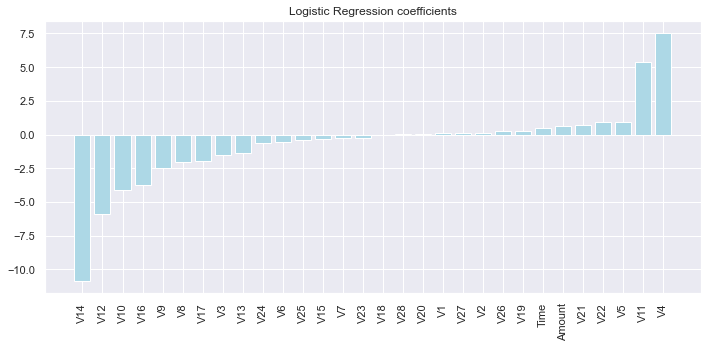

In [13]:
# Plot Logistic Regression coefficients
feat_labels = df.columns[0: 30]
importances = lm_best_alpha.coef_
indices     = np.argsort(importances)[::-1]
importances = importances[0]

plt.figure(figsize = (10, 5))
plt.title('Logistic Regression coefficients')
plt.bar(range(np.size(feat_labels)),
        importances[indices[0]], 
        color = 'lightblue', align = 'center')
plt.xticks(range(np.size(feat_labels)), 
           feat_labels[indices[0]], rotation = 90)
plt.tight_layout()

We can see on the results above that the logistic regression coefficients for V4, V11, V12 and V14 are the highest (in absolute value). This means that they are more important for this model. Note this is not surprising since we saw in the EDA that these were the features that gave most separable distributions between fraudulent and non-fraudulent. Finally, let's evaluate with more detail the classifier performance (AUPRC + PR curve + Precision + Recall) to see what should we do about the unbalance issue.

In [14]:
means = clf.cv_results_['mean_test_score']
stds  = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/- %0.03f) for %r" % (mean, std * 2, params))
print('------------------------------------------')

print(clf.best_params_)
clf.best_estimator_.fit(X_train,y_train)
y_pred = clf.best_estimator_.predict(X_test)

print('Classification report')
print(classification_report(y_test, y_pred))
print('Test AUCPR = ' + str(average_precision_score(y_test, y_pred)))

0.731 (+/- 0.035) for {'lmodel__C': 0.01}
0.751 (+/- 0.041) for {'lmodel__C': 0.1}
0.756 (+/- 0.038) for {'lmodel__C': 1.0}
------------------------------------------
{'lmodel__C': 1.0}
Classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.55      0.66        98

    accuracy                           1.00     56962
   macro avg       0.91      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

Test AUCPR = 0.4585432454156967


Text(0.5, 1.0, '2-class Precision-Recall curve: AUC = 0.46')

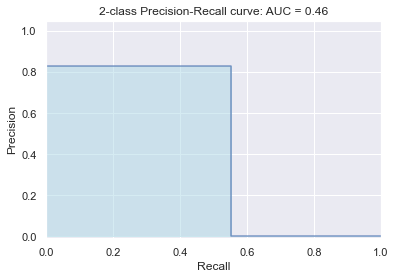

In [15]:
# Plot the Precision - Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.step(recall, precision, color = 'b', alpha = 0.7, where = 'post')
plt.fill_between(recall, precision,
                 step = 'post', alpha = 0.5, color = 'lightblue')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([-0.01, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AUC = {0:0.2f}'
                    .format(average_precision_score(y_test, y_pred)))


We can see that the performance of Logistic Regression isn't pretty good. So, let's dive into more advanced model.

---

# **Anomaly Detection Using GMM with optimized threshold T**

In this kernel, We improve our model by optimizing the GMM threshold T via 5-fold cross validation using the feature we have choosen previously in the EDA section V4, V11, V14, V17 and V12

In [16]:
# Dataset with non-fraudulent only
df_0 = df[df.Class == 0] 
# Dataset with fraudulent only
df_1 = df[df.Class == 1]    

# Select two most correlated features for now
df_0 = df_0[['V4', 'V11', 'V14', 'V17', 'V12', 'Class']]    
df_1 = df_1[['V4', 'V11', 'V14', 'V17', 'V12', 'Class']]

# Split non-fraudulent data in 90% for training GMM and 10% for cross-validation and testing
X_N_train, X_N_cv_test, y_N_train, y_N_cv_test = train_test_split(df_0.drop(['Class'], axis = 1), 
                                                                  df_0['Class'], 
                                                                  test_size = 0.1, 
                                                                  random_state = 1)

# Split the fraudulent data into 50% for cross-validation and 50% for testing
X_F_cv, X_F_test, y_F_cv, y_F_test = train_test_split(df_1.drop(['Class'], axis = 1),
                                                      df_1['Class'], 
                                                      test_size = 0.5, 
                                                      random_state = 1)

# Split the 10% non-fraudulent into 50% for cross-validation and 50% for testing
X_N_cv, X_N_test, y_N_cv, y_N_test = train_test_split(X_N_cv_test, 
                                                      y_N_cv_test, 
                                                      test_size = 0.5,
                                                      random_state = 1)

# Generate the 3 new datasets (Train + CV + test)
X_CV   = np.vstack([X_N_cv, X_F_cv])
y_CV   = np.hstack([y_N_cv, y_F_cv])
# print(len(X_CV))

X_test = np.vstack([X_N_test, X_F_test])
y_test = np.hstack([y_N_test, y_F_test])


In [17]:
# Fit a Gaussian Mixture Model with the data from the NORMAL cases.
model = GaussianMixture()
model.fit(X_N_train)

GaussianMixture()

After fitting the model, let's  find the probabilities of the test set.
- If the probability is below a threshold we will say it is a **fraudulent transaction**. 
- Low probability means that it is **non-fraudulent**.

In [18]:
# Create 5-CV split object
kfold = StratifiedKFold (n_splits=5, random_state=1) 

# Trying thresholds in steps of 2, from 0 to -1000. 
# Note we are evaluating the negative log-likelihood.
T_vec = - np.arange(0, 500, 2) 

aucpr_vs_t     = []
recall_vs_t    = []
precision_vs_t = []

for t in T_vec:
    aucpr     = []
    recall    = []
    precision = []

    k = 0
    for train_index, test_index in kfold.split(X_CV, y_CV):
        # Compute the log-likelihood of each sample
        y_cv_proba = model.score_samples(X_CV[test_index]) 
        y_cv_pred  = y_cv_proba.copy()
        y_cv_pred[y_cv_pred >= t] = 0
        y_cv_pred[y_cv_pred <  t] = 1  
#         print('Classification report')
#         print(classification_report(y_CV[test_index], y_cv_pred))
        precision.append(precision_score(y_CV[test_index], y_cv_pred))
        recall.append(recall_score(y_CV[test_index], y_cv_pred))
        aucpr.append(average_precision_score(y_CV[test_index], y_cv_pred))
#         print("Threshold T = %i --> Fold %i - aucpr=%.3f - Precision=%.3f - Recall=%.3f" %(t, k+1, aucpr[k], precision[k], recall[k]))
        k = k + 1          
            
    aucpr_vs_t.append(np.mean(aucpr))
    precision_vs_t.append(np.mean(precision))
    recall_vs_t.append(np.mean(recall))
#     print('CV average AUCPR: %.3f +/- %.3f' % (np.mean(aucpr), np.std(aucpr)))    
#     print('CV average precision: %.3f +/- %.3f' % (np.mean(precision), np.std(precision)))    
#     print('CV average recall: %.3f +/- %.3f' % (np.mean(recall), np.std(recall)))


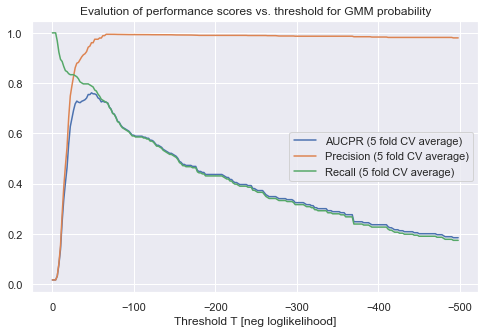

In [19]:
# Plot performance scores vs. threshold for GMM probability
plt.figure(figsize = (8, 5))
plt.plot(T_vec, aucpr_vs_t)
plt.plot(T_vec, precision_vs_t)
plt.plot(T_vec, recall_vs_t)

ax = plt.gca()
ax.set(title = 'Evalution of performance scores vs. threshold for GMM probability',
       xlabel = 'Threshold T [neg loglikelihood]')
ax.legend(['AUCPR (5 fold CV average)', 'Precision (5 fold CV average)', 
           'Recall (5 fold CV average)'])
ax.invert_xaxis()
plt.show()

Finally, we select the threshold with maximum AUCPR and use it for testing in order to obtain the performance of our model in the test data.

In [20]:
# Choosing the best threshold T_opt
print('Maximum cross validation AUCPR = ' + str(max(aucpr_vs_t)))
T_opt = T_vec[np.argmax(aucpr_vs_t)]
print('Optimal threshold T = ' + str(T_opt))

# calculate the y_test_pred according to the best threshold T_opt
y_test_proba = model.score_samples(X_test)
y_test_pred  = y_test_proba.copy()
y_test_pred[y_test_pred >= T_opt] = 0
y_test_pred[y_test_pred <  T_opt] = 1   

Maximum cross validation AUCPR = 0.7614133103078837
Optimal threshold T = -48


In [21]:
# Test our model
test_precision = precision_score(y_test, y_test_pred)
test_recall    = recall_score(y_test, y_test_pred)
test_aucpr     = average_precision_score(y_test, y_test_pred)
print("TEST results --> aucpr = %.3f - Precision = %.3f - Recall = %.3f" %(test_aucpr, test_precision, test_recall))

TEST results --> aucpr = 0.758 - Precision = 0.911 - Recall = 0.829


    Note that we have gone from an AUCPR of 0.47 using Logistic classifier to an AUCPR of 0.758. The model has been improved by optimize the threshold T using cross-validation and selecting the most important features like 'V4', 'V11', 'V14', 'V17' and 'V12'. 
    
    Hint: The AUPRC is calculated as the area under the PR curve. A PR curve shows the trade-off between precision and recall across different decision thresholds.

---